In [353]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load and inspect Data

In [354]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

print(f"Data Shape: {df.shape}")
print(f"\nMissing values: \n{display(df.isnull().sum())}")

Data Shape: (7043, 21)


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


Missing values: 
None


In [355]:
print(f"\nData Types: \n{df.dtypes}")
print(f"\nData Head (few rows): \n{display(df.head)}")


Data Types: 
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


<bound method NDFrame.head of       customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL   


Data Head (few rows): 
None


In [356]:
print(df.columns)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


# Data Cleaning

In [357]:
df = df.drop(columns='customerID')

In [359]:
df['TotalCharges'] = df['TotalCharges'].replace(' ' , np.nan)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

print("Rows with missing TotalCharges:", df['TotalCharges'].isna().sum())

# Drop missing TotalCharges
df = df.dropna(subset=['TotalCharges'])
df.reset_index(drop=True, inplace=True)

Rows with missing TotalCharges: 11


# Encode Yes/No & gender columns as 1/0

In [360]:
for col in df.columns:
    if set(df[col].unique()) == set(['Yes', 'No']):
        df[col] = df[col].map({'Yes': 1, 'No': 0})

if 'gender' in df.columns:
    df['gender'] = df['gender'].map({'Female': 1, 'Male': 0})

One-hot encode other categoricals

In [361]:
df = pd.get_dummies(df, drop_first=True)

In [362]:
df.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,1,29.85,29.85,0,...,False,False,False,False,False,False,False,False,True,False
1,0,0,0,0,34,1,0,56.95,1889.50,0,...,False,False,False,False,False,True,False,False,False,True
2,0,0,0,0,2,1,1,53.85,108.15,1,...,False,False,False,False,False,False,False,False,False,True
3,0,0,0,0,45,0,0,42.30,1840.75,0,...,True,False,False,False,False,True,False,False,False,False
4,1,0,0,0,2,1,1,70.70,151.65,1,...,False,False,False,False,False,False,False,False,True,False
5,1,0,0,0,8,1,1,99.65,820.50,1,...,False,False,True,False,True,False,False,False,True,False
6,0,0,0,1,22,1,1,89.10,1949.40,0,...,False,False,True,False,False,False,False,True,False,False
7,1,0,0,0,10,0,0,29.75,301.90,0,...,False,False,False,False,False,False,False,False,False,True
8,1,0,1,0,28,1,1,104.80,3046.05,1,...,True,False,True,False,True,False,False,False,True,False
9,0,0,0,1,62,1,0,56.15,3487.95,0,...,False,False,False,False,False,True,False,False,False,False


# Feature/Target Split

In [363]:
X = df.drop('Churn', axis=1)
y = df['Churn']

# training/test split 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [365]:
print(X_train)

      gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
2959       0              0        1           0      24             1   
5105       1              0        1           1      71             1   
5354       0              0        1           1      70             1   
5066       1              0        0           1      49             1   
156        1              0        0           0      22             1   
...      ...            ...      ...         ...     ...           ...   
4931       0              0        0           0       1             1   
3264       0              0        0           0      65             1   
1653       0              0        1           1      50             1   
2607       1              0        1           1      14             1   
2732       0              0        0           0      64             1   

      PaperlessBilling  MonthlyCharges  TotalCharges  \
2959                 1           58.35       1346.90   

In [366]:
print(X_test)

      gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
5552       0              0        0           0       1             1   
5805       0              0        0           0      16             1   
2640       1              0        0           0       1             1   
3976       0              0        0           0       1             0   
6429       0              1        0           0       1             1   
...      ...            ...      ...         ...     ...           ...   
2752       1              0        1           1      69             1   
5693       0              1        1           1      71             1   
1657       0              0        0           0       5             1   
2761       1              0        1           0      64             1   
2913       0              1        1           0       8             0   

      PaperlessBilling  MonthlyCharges  TotalCharges  \
5552                 0           20.65         20.65   

In [367]:
print(y_train)

2959    0
5105    0
5354    0
5066    0
156     0
       ..
4931    0
3264    0
1653    1
2607    0
2732    0
Name: Churn, Length: 5625, dtype: int64


In [368]:
print(y_test)

5552    0
5805    0
2640    0
3976    1
6429    1
       ..
2752    0
5693    1
1657    1
2761    0
2913    0
Name: Churn, Length: 1407, dtype: int64


# ML Model Pipeline

In [ ]:
LR_pipeline = Pipeline([
    ('imputer' , SimpleImputer(missing_values=np.nan , strategy='mean')),
    ('scaler' , StandardScaler()),
    ('model_lr' , LogisticRegression( max_iter = 1000))
])

RF_pipeline = Pipeline([
    ('imputer' , SimpleImputer(missing_values=np.nan , strategy='mean')),
    ('scaler' , StandardScaler()),
    ('model_lr' , RandomForestClassifier( n_estimators = 100 , random_state = 42 ))
])

# Fit Models


In [370]:
LR_pipeline.fit(X_train , y_train)
RF_pipeline.fit(X_train , y_train)

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler()),
                ('model_lr', RandomForestClassifier(random_state=42))])

In [371]:
y_pred_lr = LR_pipeline.predict(X_test)
y_pred_rf = RF_pipeline.predict(X_test)

# Evaluation

In [ ]:
print('Logistic regression: \n' , classification_report(y_test , y_pred_lr))
print('____________________________________________________________________\n')
print('Random forest: \n' , classification_report(y_test , y_pred_rf))
print('____________________________________________________________________\n')
print('Accuracy (LR) : \n' , accuracy_score(y_test , y_pred_lr))
print('Accuracy (RF) : \n' , accuracy_score(y_test , y_pred_rf))

Logistic regression: 
               precision    recall  f1-score   support

           0       0.85      0.90      0.87      1038
           1       0.66      0.55      0.60       369

    accuracy                           0.81      1407
   macro avg       0.75      0.72      0.74      1407
weighted avg       0.80      0.81      0.80      1407

____________________________________________________________________

Random forest: 
               precision    recall  f1-score   support

           0       0.83      0.90      0.86      1038
           1       0.63      0.49      0.55       369

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.71      1407
weighted avg       0.78      0.79      0.78      1407

____________________________________________________________________

Accuracy (LR) : 
 0.8073916133617626
Accuracy (RF) : 
 0.7910447761194029


# Confusion Matrices

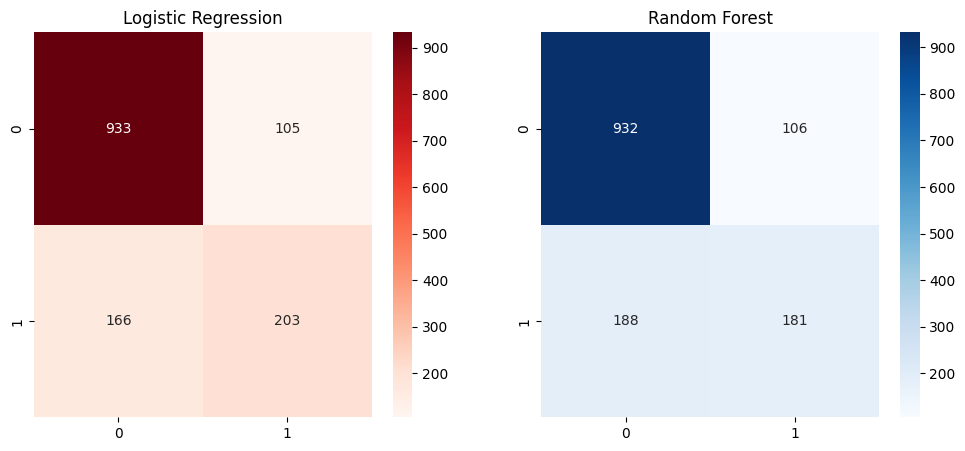

In [373]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', ax=ax[0], cmap='Reds')
ax[0].set_title('Logistic Regression')
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', ax=ax[1], cmap='Blues')
ax[1].set_title('Random Forest')
plt.show()